# Problem1

In [3]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

(2, 100)
(2, 100)


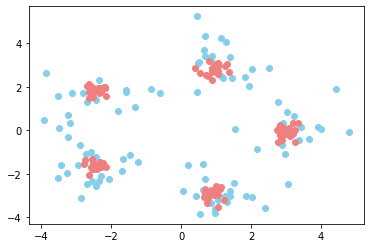

In [2]:
kmean_data = sio.loadmat("11HW1_KmeanData.mat")
data_y = kmean_data['Y']
data_x = kmean_data['X']
print(data_y.shape)
print(data_x.shape)
plt.scatter(data_x[0], data_x[1], c='skyblue')
plt.scatter(data_y[0], data_y[1], c='lightcoral')
plt.show()

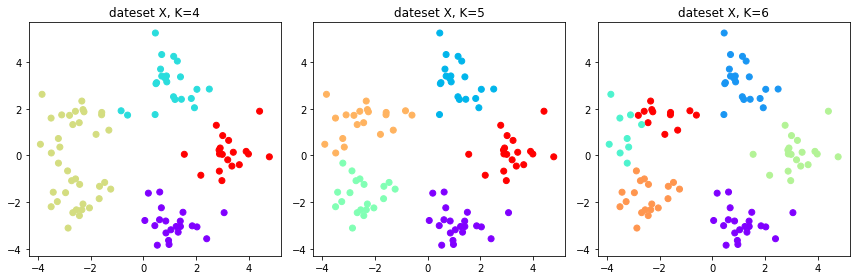

In [15]:
plt.figure(figsize=(12, 4))
for i in range(4,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_x.T)
    predict = kmeans.predict(data_x.T)
    plt.subplot(1,3,i-3)
    plt.title(f'dateset X, K={i}')
    plt.scatter(data_x[0], data_x[1], c=predict, cmap='rainbow')
plt.tight_layout()
plt.show()

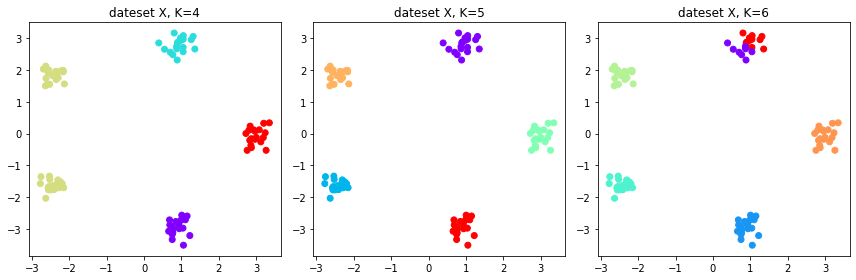

In [16]:
plt.figure(figsize=(12, 4))
for i in range(4, 7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_y.T)
    predict = kmeans.predict(data_y.T)
    plt.subplot(1,3,i-3)
    plt.title(f'dateset X, K={i}')
    plt.scatter(data_y[0], data_y[1], c=predict, cmap='rainbow')
plt.tight_layout()
plt.show()

k=5 is the best for clustering.

# Problem2

In [41]:
import cv2 as cv
from tqdm import tqdm

In [19]:
img = cv.imread('11HW2_PatchPanels.jpg')
img_gray = cv.imread('11HW2_PatchPanelsGrey.jpeg', cv.IMREAD_GRAYSCALE)
clust = [2, 5, 10, 15, 20]

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:19<00:00,  3.80s/it]


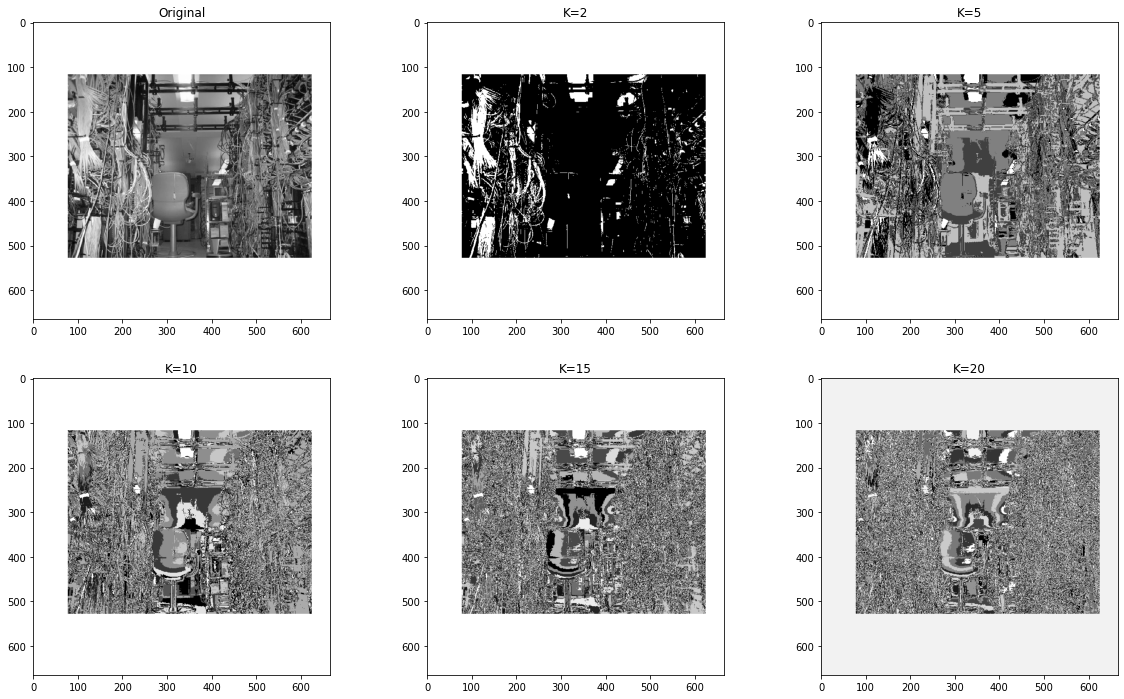

In [44]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.title('Original')
plt.imshow(img_gray, cmap='gray')

for i in tqdm(range(5)):
    kmeans = KMeans(n_clusters=clust[i])
    kmeans.fit(img_gray.reshape(-1, 1))
    predict = kmeans.predict(img_gray.reshape(-1, 1)).astype(np.float32)
    predict /= predict.max()
    predict -= 1
    predict *= -255
    k_gray = np.reshape(predict, img_gray.shape)
    plt.subplot(2,3,i+2)
    plt.title(f'K={clust[i]}')
    plt.imshow(k_gray, cmap='gray')
plt.show()

100%|██████████| 5/5 [00:30<00:00,  6.06s/it]


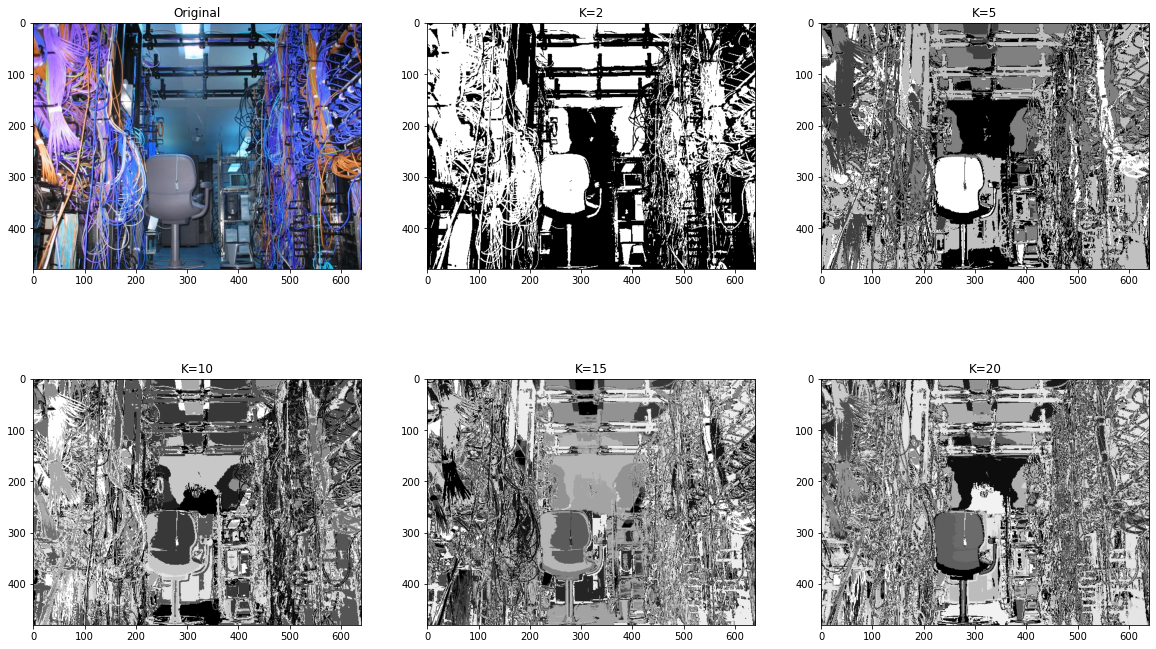

In [46]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.title('Original')
plt.imshow(img)

for i in tqdm(range(5)):
    kmeans = KMeans(n_clusters=clust[i])
    kmeans.fit(img.reshape(-1, 3))
    predict = kmeans.predict(img.reshape(-1, 3)).astype(np.float32)
    predict /= predict.max()
    predict -= 1
    predict *= -255
    k_color = np.reshape(predict, (img.shape[0], img.shape[1]))
    plt.subplot(2,3,i+2)
    plt.title(f'K={clust[i]}')
    plt.imshow(k_color, cmap='gray')
plt.show()

Originally, the data is size of (640,480,3), after compression the data becomes (640,480). The diversity of color decided by the number of cluster. as we can see, when k=2, the color only have black and white. However, when the number of clusters enhanced, image beome gray scale and more complicated. But K=15 and K=20 are too high to make image more chaos. Therefore, I think k=5 is the most appropiate values for clustering.